In [1]:
# Importing important libraries

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the data

df = pd.read_csv("F:\\csv\\Mall_Customers_BP.csv")

In [3]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Checking null values or missing values

df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# Checking the data type of that data

df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
# Performing standard scaling to preprocess the data 

scaler = StandardScaler()
df[["Annual Income (k$)","Spending Score (1-100)"]] = scaler.fit_transform(df[["Annual Income (k$)","Spending Score (1-100)"]])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,-1.738999,-0.434801
1,2,Male,21,-1.738999,1.195704
2,3,Female,20,-1.700830,-1.715913
3,4,Female,23,-1.700830,1.040418
4,5,Female,31,-1.662660,-0.395980


In [ ]:
# This shows that the standard deviation is 1 and the mean is 0

In [13]:
# Identifying optimum number of clusters 

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,15)


In [14]:
# Make a separate array file having data for required columns

array1 = df['Annual Income (k$)'].to_numpy()
array2 = df['Spending Score (1-100)'].to_numpy()

array = np.array(list(zip(array1,array2))).reshape(len(array1), 2 )

In [15]:
# for loop

for k in K:
    
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(array)
    
    distortions.append(sum(np.min(cdist(array , kmeanModel.cluster_centers_,
                                       "euclidean"), axis = 1)) / array.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = sum(np.min(cdist(array , kmeanModel.cluster_centers_,
                                       "euclidean"), axis = 1)) / array.shape[0]
    
    mapping2[k] = kmeanModel.inertia_
    

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
# Using Distortions 

for key,val in mapping1.items():
    print(str(key) + ' : ' + str(val))

1 : 1.197935444974564
2 : 1.043736064216081
3 : 0.7501916546715333
4 : 0.6351847618045524
5 : 0.5005663590363227
6 : 0.4657907337855732
7 : 0.43376940052842167
8 : 0.3844029674577969
9 : 0.35933317905195983
10 : 0.3408639692285228
11 : 0.3164408238990838
12 : 0.30697404718314286
13 : 0.29262609618041835
14 : 0.278499153828599


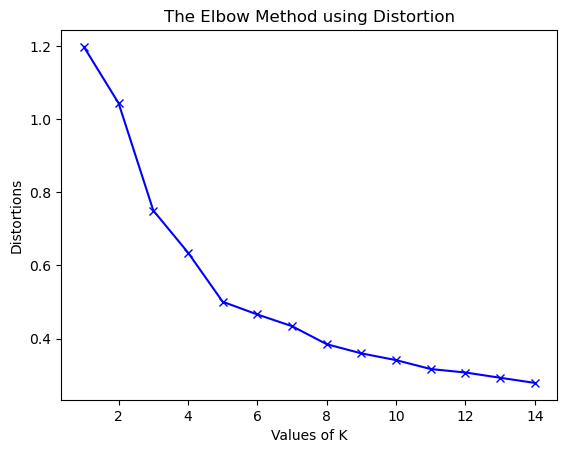

In [17]:
# Plot

plt.plot(K , distortions , 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortions')
plt.title('The Elbow Method using Distortion')
plt.show()

In [18]:
# Using Inertias

for key,val in mapping2.items():
    print(str(key) + ' : ' + str(val))

1 : 400.0
2 : 270.70426664306717
3 : 157.70400815035947
4 : 108.92131661364357
5 : 65.56840815571681
6 : 55.067795914519664
7 : 44.91118554999014
8 : 37.15135706793106
9 : 32.36022982569204
10 : 29.267974505812255
11 : 26.025282253418727
12 : 23.37200984876782
13 : 21.61332561503747
14 : 19.568664331643994


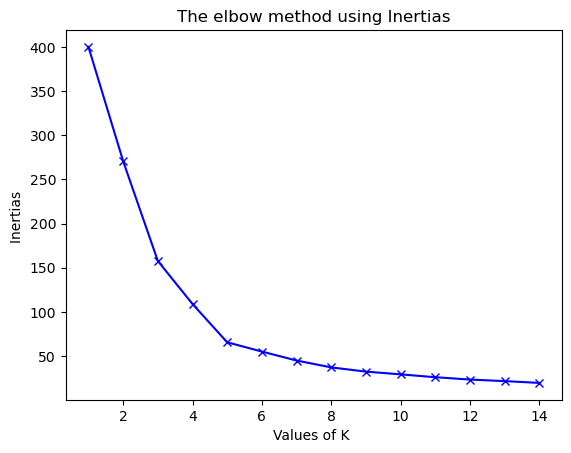

In [19]:


plt.plot(K , inertias ,'bx-')
plt.xlabel("Values of K ")
plt.ylabel("Inertias ")
plt.title('The elbow method using Inertias')
plt.show()